# 와인 베스트 모델 찾기

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

### 데이터 전처리

In [3]:
from google.colab import files 
uploaded = files.upload()

Saving wine.csv to wine.csv


In [4]:
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(df.iloc[:,:-1].values)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_norm, df[12].values, stratify=df[12].values, random_state=2021
)
X_train.shape, X_test.shape

((4872, 12), (1625, 12))

### 모델 정의/설정

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
model = Sequential([
    Dense(30, input_dim=12, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')                
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                390       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### 모델 저장관련 설정

In [13]:
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [14]:
# 모델 파일 이름
modelpath = MODEL_DIR + 'wine-{epoch:03d}.hdf5'

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(
                    filepath=modelpath,     # 모델을 저장할 파일
                    monitor='val_loss',     # validation loss를 체크
                    verbose=1,
                    save_best_only=True     # 베스트 모델만 저장
)

### 모델 학습

In [16]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200, batch_size=200,
    verbose=0,
    callbacks=[checkpoint]      # 위에서 정의한 checkpoint
)


Epoch 00001: val_loss improved from inf to 0.57130, saving model to ./model/wine-001.hdf5

Epoch 00002: val_loss improved from 0.57130 to 0.47085, saving model to ./model/wine-002.hdf5

Epoch 00003: val_loss improved from 0.47085 to 0.36882, saving model to ./model/wine-003.hdf5

Epoch 00004: val_loss improved from 0.36882 to 0.28201, saving model to ./model/wine-004.hdf5

Epoch 00005: val_loss improved from 0.28201 to 0.21210, saving model to ./model/wine-005.hdf5

Epoch 00006: val_loss improved from 0.21210 to 0.15115, saving model to ./model/wine-006.hdf5

Epoch 00007: val_loss improved from 0.15115 to 0.09823, saving model to ./model/wine-007.hdf5

Epoch 00008: val_loss improved from 0.09823 to 0.06449, saving model to ./model/wine-008.hdf5

Epoch 00009: val_loss improved from 0.06449 to 0.04949, saving model to ./model/wine-009.hdf5

Epoch 00010: val_loss improved from 0.04949 to 0.04190, saving model to ./model/wine-010.hdf5

Epoch 00011: val_loss improved from 0.04190 to 0.0373

### 잘못된 평가

In [17]:
acc = model.evaluate(X_test, y_test)
print(f'정확도: {acc[1]:.4f}')

51/51 [==============================] - 0s 1ms/step - loss: 0.0376 - accuracy: 0.9969
정확도: 0.9969


### 베스트 모델로 평가해야 함

In [19]:
from tensorflow.keras.models import load_model

best_model = load_model('model/wine-063.hdf5')
acc = best_model.evaluate(X_test, y_test)
print(f'정확도: {acc[1]:.4f}')

51/51 [==============================] - 0s 1ms/step - loss: 0.0170 - accuracy: 0.9975
정확도: 0.9975


### 훈련과정 시각화

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
y_acc = history.history['accuracy']
y_loss = history.history['loss']
y_vacc = history.history['val_accuracy']
y_vloss = history.history['val_loss']

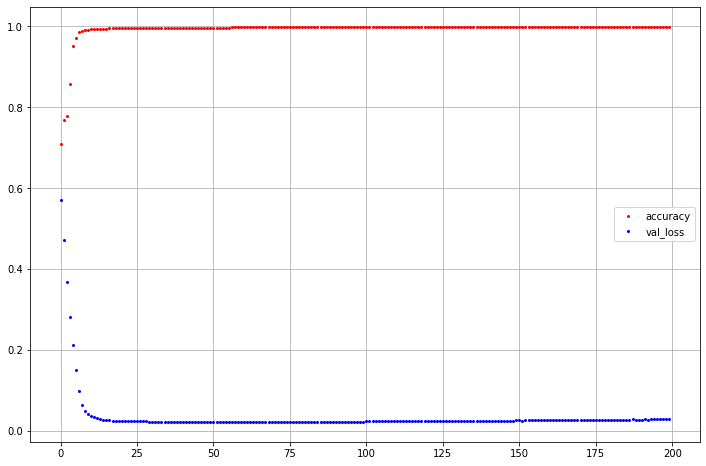

In [26]:
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'ro', markersize=2, label='accuracy')
#plt.plot(x_len, y_vacc, 'go', markersize=2, label='val_accuracy')
#plt.plot(x_len, y_loss, 'yo', markersize=2, label='loss')
plt.plot(x_len, y_vloss, 'bo', markersize=2, label='val_loss')
plt.grid()
plt.legend()
plt.show()